# Training the sentiment classifier

## Load the data

In [1]:
from mba.data import (
    get_text_train_df,
    get_text_rollout_df,
)

In [2]:
train_df = get_text_train_df()

In [3]:
train_df

,ID,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,...,solut,normal,corner,gourmet,product,sinc,was,look,onto,rating
0,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,1,0,1
1,2,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,0,1
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1996,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1996,1997,0,0,0,0,0,0,0,2,0,...,0,0,0,0,0,0,0,0,0,1
1997,1998,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,3,0,1,0,1
1998,1999,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0


In [4]:
train_df = train_df.drop('ID', axis=1)
train_df.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,solut,normal,corner,gourmet,product,sinc,was,look,onto,rating
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,2,1,0,1
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [5]:
X = train_df.drop(['rating'], axis=1)
X.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,veri,solut,normal,corner,gourmet,product,sinc,was,look,onto
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,2,1,0
1,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Check this will work with review data

In [6]:
import pandas as pd

In [7]:
df = pd.read_csv('/Users/shaypalachy/clones/mba/data/reviews_training.csv')

In [8]:
df = df.drop('ID', axis=1)

In [9]:
df.head(3)

,continu,name,perhap,gotten,compliment,appli,fail,treat,slight,picki,...,veri,solut,normal,corner,gourmet,product,sinc,was,look,onto
0,0,0,0,0,0,0,0,0,0,0,...,2,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [10]:
list(df.columns) == list(X.columns)

True

In [11]:
# X.columns

In [12]:
# y = train_df['rating']

In [13]:
# y.value_counts()

In [14]:
# from sklearn.model_selection import train_test_split

In [15]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Selecting a model with pycaret

In [16]:
from pycaret.classification import setup, compare_models

In [17]:
# setup?

In [18]:
clf_handle = setup(
    data = train_df,
    target = 'rating',
    train_size=0.8,
    session_id=123,
    numeric_features=list(X.columns),
    normalize=True,
    remove_perfect_collinearity=True,
    data_split_stratify=True,
    silent=True,
) 

,Description,Value
0,session_id,123
1,Target,rating
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(2000, 2001)"
5,Missing Values,0
6,Numeric Features,2000
7,Categorical Features,0
8,Ordinal Features,0
9,High Cardinality Features,0


In [19]:
# compare_models?

In [20]:
top3 = compare_models(n_select=3, sort='AUC')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8431,0.9260,0.9243,0.8373,0.8780,0.6594,0.6683,3.2450
xgboost,Extreme Gradient Boosting,0.8406,0.9187,0.8978,0.8520,0.8734,0.6584,0.6628,3.9730
lr,Logistic Regression,0.8450,0.9155,0.8987,0.8590,0.8770,0.6675,0.6730,0.6350
et,Extra Trees Classifier,0.8525,0.9150,0.9192,0.8520,0.8838,0.6824,0.6878,0.3360
lightgbm,Light Gradient Boosting Machine,0.8369,0.9110,0.8875,0.8528,0.8693,0.6523,0.6549,1.0870
gbc,Gradient Boosting Classifier,0.8212,0.9047,0.9141,0.8171,0.8620,0.6101,0.6215,0.7850
rf,Random Forest Classifier,0.8225,0.9036,0.9346,0.8077,0.8659,0.6076,0.6239,0.2500
ada,Ada Boost Classifier,0.8019,0.8792,0.8721,0.8181,0.8432,0.5743,0.5794,0.2630
lda,Linear Discriminant Analysis,0.6806,0.7231,0.7055,0.7569,0.7300,0.3400,0.3418,1.2900
dt,Decision Tree Classifier,0.7206,0.6986,0.7975,0.7593,0.7775,0.4026,0.4043,0.0800


In [21]:
print(top3)

[<catboost.core.CatBoostClassifier object at 0x158884850>, XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=-1,
              num_parallel_tree=1, objective='binary:logistic',
              predictor='auto', random_state=123, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method='auto',
              use_label_encoder=True, validate_parameters=1, verbosity=0), LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   rand

In [22]:
# from pycaret.classification import create_model

In [23]:
# # train individual models to blend
# lightgbm = create_model('lightgbm', verbose = False)
# et = create_model('et', verbose = False)
# lr = create_model('lr', verbose = False)

In [24]:
from pycaret.classification import blend_models

In [25]:
# blend individual models
# blend_soft = blend_models(estimator_list = [lightgbm, et, lr], method = 'soft')

In [26]:
blender_top3 = blend_models(top3)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8438,0.9128,0.8878,0.8614,0.8744,0.6679,0.6684
1,0.8438,0.9276,0.9184,0.8411,0.8780,0.6618,0.6668
2,0.9312,0.9761,0.9796,0.9143,0.9458,0.8521,0.8559
3,0.8875,0.9672,0.9286,0.8922,0.9100,0.7602,0.7612
4,0.8625,0.9319,0.8980,0.8800,0.8889,0.7086,0.7089
5,0.8188,0.9113,0.9286,0.8053,0.8626,0.6004,0.6137
6,0.8812,0.9478,0.9490,0.8692,0.9073,0.7430,0.7486
7,0.8625,0.9329,0.9592,0.8393,0.8952,0.6978,0.7111
8,0.9125,0.9561,0.9175,0.9368,0.9271,0.8177,0.8180
9,0.8375,0.9509,0.9381,0.8198,0.8750,0.6458,0.6579


In [27]:
from pycaret.classification import predict_model, finalize_model

In [28]:
res = predict_model(blender_top3)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Voting Classifier,0.8600,0.9341,0.9139,0.8643,0.8884,0.7009,0.7029


In [29]:
from pycaret.classification import get_metrics

In [30]:
get_metrics()

,Name,Display Name,Score Function,Scorer,Target,Args,Greater is Better,Multiclass,Custom
ID,,,,,,,,,
acc,Accuracy,Accuracy,<function accuracy_score at 0x141cf2e50>,accuracy,pred,{},True,True,False
auc,AUC,AUC,<function roc_auc_score at 0x141ce9c10>,"make_scorer(roc_auc_score, needs_proba=True, e...",pred_proba,"{'average': 'weighted', 'multi_class': 'ovr'}",True,True,False
recall,Recall,Recall,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(recall_score, average=macro)",pred,{'average': 'macro'},True,True,False
precision,Precision,Prec.,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(precision_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
f1,F1,F1,<pycaret.internal.metrics.BinaryMulticlassScor...,"make_scorer(f1_score, average=weighted)",pred,{'average': 'weighted'},True,True,False
kappa,Kappa,Kappa,<function cohen_kappa_score at 0x141cfe1f0>,make_scorer(cohen_kappa_score),pred,{},True,True,False
mcc,MCC,MCC,<function matthews_corrcoef at 0x141cfe430>,make_scorer(matthews_corrcoef),pred,{},True,True,False


In [31]:
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score, precision_score, f1_score, auc, roc_curve

In [32]:
y_true = res['rating']
y_pred = res['Label']

In [33]:
for metric in (accuracy_score, roc_auc_score, recall_score, precision_score, f1_score):
    print(metric.__name__)
    print(metric(y_true, y_pred))

accuracy_score
0.86
roc_auc_score
0.844787725935267
recall_score
0.9139344262295082
precision_score
0.8643410852713178
f1_score
0.8884462151394421


In [54]:
# predict_model?

In [35]:
final_blended = finalize_model(blender_top3)

In [36]:
from pycaret.classification import plot_model

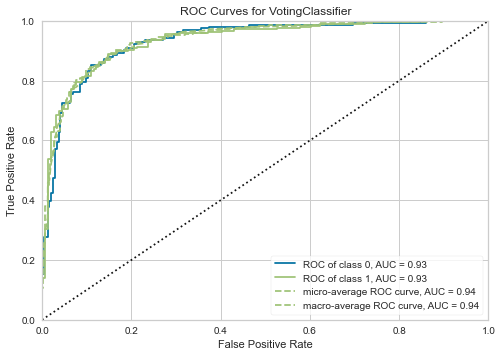

In [37]:
plot_model(blender_top3, plot = 'auc')

In [38]:
from pycaret.classification import save_model

In [55]:
# save_model?

/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/c

/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/c

/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/c

/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute standard_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_coef_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/clones/mba/.venv/lib/python3.8/site-packages/sklearn/utils/deprecation.py:101: FutureWarning: Attribute average_intercept_ was deprecated in version 0.23 and will be removed in 0.25.
  warnings.warn(msg, category=FutureWarning)
/Users/shaypalachy/c

In [40]:
from pycaret.classification import save_model

In [41]:
# et = create_model('et')

In [42]:
# from pycaret.classification import tune_model

In [43]:
# tuned_et = tune_model(et)

In [44]:
# from pycaret.classification import plot_model

In [45]:
# plot_model(et, plot = 'auc')

In [46]:
# plot_model(tuned_et, plot = 'auc')

In [47]:
# from pycaret.classification import predict_model, finalize_model

In [48]:
# predict_model(tuned_et);

In [49]:
# predict_model(et);

In [50]:
# final_et = finalize_model(et)

In [51]:
# final_et